# Part I - Ford GoBike System Data
## by Kenechukwu Nwankwo

## Table of Contents
- Introduction
- Prelimnary Wrangling
- Univariate Exploration
- Bivariate Exploration
- Multivariate Exploration
- Conclusions

## Introduction

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.  


## Preliminary Wrangling


In [56]:
# import all packages and set plots to be embedded inline
import numpy as np # for numerical computations
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for visualisation
import seaborn as sns # for visualisation
from datetime import datetime # for datetime computations

%matplotlib inline

Loading in the dataset and describing its properties


In [57]:
# read in the data
bike_df = pd.read_csv('201902-fordgobike-tripdata.csv')

# make a copy of the data
df = bike_df.copy()

# display the first five rows of the dataset
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [58]:
# getting the dimension of the data
df.shape

(183412, 16)

There are 183412 rows and 16 columns in the dataset

In [59]:
# checking for duplicated rows
df.duplicated().sum()

0

There are no duplicated rows in the dataset

In [60]:
# getting a summary of the features of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

- The start_time and end_time columns have been cast as object by pandas. I would be converting them to date time.
- There are missing values in the start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender columns, and these would be treated. 
- The start_station_id, end_station_id and member_birth_year columns have been cast as float. I would be converting them to integer data type. 

### What is the structure of your dataset?

> There are 183412 rows and 16 columns in the dataset

### What is/are the main feature(s) of interest in your dataset?

> My main features of interestare member age, user type, meber gender and duration of rides 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Getting the age from the member birth year and the Day of the week ride happened will help my analysis. This will entail converting the Start time to 

#### Conversion to datetime data type

In [61]:
# converting start_time to datetime
df['start_time'] = pd.to_datetime(df['start_time'])

# converting end_time to datetime
df['end_time'] = pd.to_datetime(df['end_time'])

#### Null Values

In [62]:
# checking for null values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

As seen in the summary of the dataset, there are null values in the start_station_id, start_station_name, end_station_id, end_station_name columns. All four columns have the same number of missing values.  
Also, the member_birth_year and member_gender columns have the same number of missing values.

In [63]:
# subsetting the data to investigate null values in the start_station_id, start_station_name, end_station_id and end_station_name columns 
df[df['start_station_id'].isnull()].sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
54603,532,2019-02-21 12:25:53.670,2019-02-21 12:34:46.367,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.93,4207,Subscriber,1986.0,Male,No
59280,740,2019-02-20 20:35:21.011,2019-02-20 20:47:41.562,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.94,4239,Customer,NaN,NaN,No
63616,665,2019-02-20 14:21:50.670,2019-02-20 14:32:56.168,NaN,NaN,37.40,-121.93,NaN,NaN,37.39,-121.93,4207,Subscriber,1986.0,Male,No
74835,530,2019-02-19 09:41:20.989,2019-02-19 09:50:11.688,NaN,NaN,37.40,-121.93,NaN,NaN,37.39,-121.93,4207,Subscriber,1986.0,Male,No
63585,552,2019-02-20 14:28:13.830,2019-02-20 14:37:26.529,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.94,4168,Customer,1960.0,Male,No
127820,936,2019-02-10 14:42:20.473,2019-02-10 14:57:57.216,NaN,NaN,37.42,-121.95,NaN,NaN,37.41,-121.94,4165,Subscriber,1994.0,Male,No
31340,336,2019-02-24 17:02:14.842,2019-02-24 17:07:51.385,NaN,NaN,37.40,-121.93,NaN,NaN,37.40,-121.92,4095,Subscriber,1991.0,Male,No
48467,989,2019-02-22 07:38:09.367,2019-02-22 07:54:38.472,NaN,NaN,37.41,-121.94,NaN,NaN,37.40,-121.92,4197,Subscriber,1976.0,Male,No
11071,828,2019-02-27 19:03:14.638,2019-02-27 19:17:03.434,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4091,Subscriber,1980.0,Male,No
35870,1922,2019-02-23 17:08:24.026,2019-02-23 17:40:26.827,NaN,NaN,37.40,-121.93,NaN,NaN,37.40,-121.93,4168,Customer,1990.0,Female,No


In [64]:
# subsetting the data to investigate null values in the member_birth_year and member_gender columns
df[df['member_birth_year'].isnull()].sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
121501,8318,2019-02-11 12:53:03.013,2019-02-11 15:11:41.224,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,4713,Customer,NaN,NaN,No
4286,669,2019-02-28 16:06:37.586,2019-02-28 16:17:47.226,104.0,4th St at 16th St,37.767045,-122.390833,16.0,Steuart St at Market St,37.794130,-122.394430,6322,Subscriber,NaN,NaN,No
24145,995,2019-02-25 18:35:16.382,2019-02-25 18:51:51.680,155.0,Emeryville Public Market,37.840521,-122.293528,160.0,West Oakland BART Station,37.805318,-122.294837,4580,Subscriber,NaN,NaN,No
44283,834,2019-02-22 14:58:38.485,2019-02-22 15:12:32.763,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,126.0,Esprit Park,37.761634,-122.390648,5549,Customer,NaN,NaN,No
97764,816,2019-02-15 08:32:04.701,2019-02-15 08:45:41.016,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,104.0,4th St at 16th St,37.767045,-122.390833,4382,Subscriber,NaN,NaN,No
145577,678,2019-02-07 09:26:52.976,2019-02-07 09:38:11.610,74.0,Laguna St at Hayes St,37.776435,-122.426244,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,5481,Customer,NaN,NaN,No
55191,615,2019-02-21 10:43:40.952,2019-02-21 10:53:56.203,104.0,4th St at 16th St,37.767045,-122.390833,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,5188,Subscriber,NaN,NaN,No
47723,796,2019-02-22 08:27:23.355,2019-02-22 08:40:39.551,369.0,Hyde St at Post St,37.787349,-122.416651,88.0,11th St at Bryant St,37.770030,-122.411726,4759,Subscriber,NaN,NaN,No
85685,247,2019-02-17 14:42:27.503,2019-02-17 14:46:34.738,345.0,Hubbell St at 16th St,37.766483,-122.398279,92.0,Mission Bay Kids Park,37.772301,-122.393028,6555,Customer,NaN,NaN,No
43457,847,2019-02-22 16:26:29.584,2019-02-22 16:40:36.943,49.0,S Park St at 3rd St,37.780760,-122.394989,323.0,Broadway at Kearny,37.798014,-122.405950,5229,Subscriber,NaN,NaN,No


Getting random samples of the null values in the 'start_station_id' column shows that the null values appear in all four columns in the same places. This is also the case in the member_birth_year and member_gender columns.  
As it is difficult to infer the missing values from the rest of the data, I would be dropping all null values.

In [65]:
# dropping the null values
df.dropna(inplace=True)

# resetting the index of the dataset
df.reset_index(drop=True, inplace=True)

In [66]:
# quality check
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

#### Conversion to integer datatype

#### Code

In [67]:
# converting the start_station_id, end_station_id and member_birth_year columns to integer datatype
df[['start_station_id', 'end_station_id', 'member_birth_year']] = df[['start_station_id', 'end_station_id', 'member_birth_year']].astype(int)

#### Test 

In [68]:
#quality check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int64         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int64         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

### Creating extra columns to aid analysis

#### Member Age

Code

In [69]:
# creating a function to get the members' ages
def get_age(year):
    current_year = datetime.now().year
    return current_year - year
    
# applying the function
df['member_age'] = df['member_birth_year'].apply(get_age)

Test

In [70]:
# quality check
df['member_age'].value_counts()

35     10214
30      9323
34      8967
33      8640
32      8484
       ...  
95         1
145        1
93         1
113        1
96         1
Name: member_age, Length: 75, dtype: int64

#### Extracting Day of the week

Code

In [71]:
#creating a column for day of the week
df['ride_dow'] = pd.to_datetime(df['start_time']).dt.strftime("%A")

Test

In [72]:
# quality check
df['ride_dow'].value_counts()

Thursday     33712
Tuesday      30584
Wednesday    28426
Friday       27663
Monday       25641
Sunday       14512
Saturday     14414
Name: ride_dow, dtype: int64

In [73]:
# statistical overview of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_sec,174952.0,704.002744,1642.204905,61.000000,323.000000,510.000000,789.000000,84548.000000
start_station_id,174952.0,139.002126,111.648819,3.000000,47.000000,104.000000,239.000000,398.000000
start_station_latitude,174952.0,37.771220,0.100391,37.317298,37.770407,37.780760,37.797320,37.880222
start_station_longitude,174952.0,-122.351760,0.117732,-122.453704,-122.411901,-122.398279,-122.283093,-121.874119
end_station_id,174952.0,136.604486,111.335635,3.000000,44.000000,101.000000,238.000000,398.000000
end_station_latitude,174952.0,37.771414,0.100295,37.317298,37.770407,37.781010,37.797673,37.880222
end_station_longitude,174952.0,-122.351335,0.117294,-122.453704,-122.411647,-122.397437,-122.286533,-121.874119
bike_id,174952.0,4482.587555,1659.195937,11.000000,3799.000000,4960.000000,5505.000000,6645.000000
member_birth_year,174952.0,1984.803135,10.118731,1878.000000,1980.000000,1987.000000,1992.000000,2001.000000
member_age,174952.0,38.196865,10.118731,22.000000,31.000000,36.000000,43.000000,145.000000


- Duration of most rides is between 323 - 739 seconds
- Most riders are between 31 - 43 years old

# Data Visualization and Analysis

## Univariate Analysis

In [74]:
# Function for univariate plots
def univariate_plot(variable, plot_title, plot_type = sns.histplot):
    """Function for univariate plots
    Args: 
        variable: a column to be plotted
        plot_title: title of the plot
        plot_type: the type of plot e.g hisplot, countplot, etc
    """
    plt.figure(figsize=(10, 5))
    plot_type(data=df, x=variable)
    plt.xticks(rotation = 45)
    plt.title(plot_title); 
    
    
# Function for bivariate plots
def bivariate_plot(variable_x, plot_title, variable_y='duration_sec', plot_type = sns.barplot):
    """Function for univariate plots
    Args: 
        variable_x: a column to be plotted on the x_axis
        plot_title: title of the plot
        variable_y: a column to be plotted on the y_axis
        plot_type: the type of plot e.g catplot
    """
    plt.figure(figsize=(10, 5))
    plot_type(data=df, x=variable_x, y=variable_y) 
    plt.xticks(rotation = 45)
    plt.title(plot_title); 

#### Duration

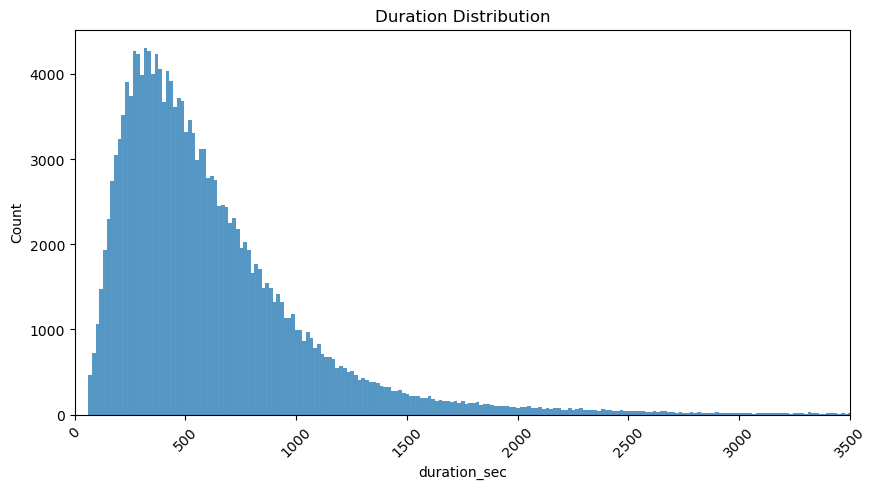

In [75]:
univariate_plot('duration_sec', 'Duration Distribution')
plt.xlim([0, 3500]);

- Most rides usually last between 0 - 1500 seconds. 
- This distribution is right-skewed, so I would be log transforming it.

In [76]:
# Checking duration in seconds
print(f"Minimum Duration: {df['duration_sec'].min()}")
print(f"Maximum Duration: {df['duration_sec'].max()}")
print(f"Average Duration: {df['duration_sec'].mean()}")

Minimum Duration: 61
Maximum Duration: 84548
Average Duration: 704.0027436096758


In [77]:
# log transforming the duration in seconds column
df['log_duration_sec'] = np.log(df['duration_sec'])

#### Log Duration

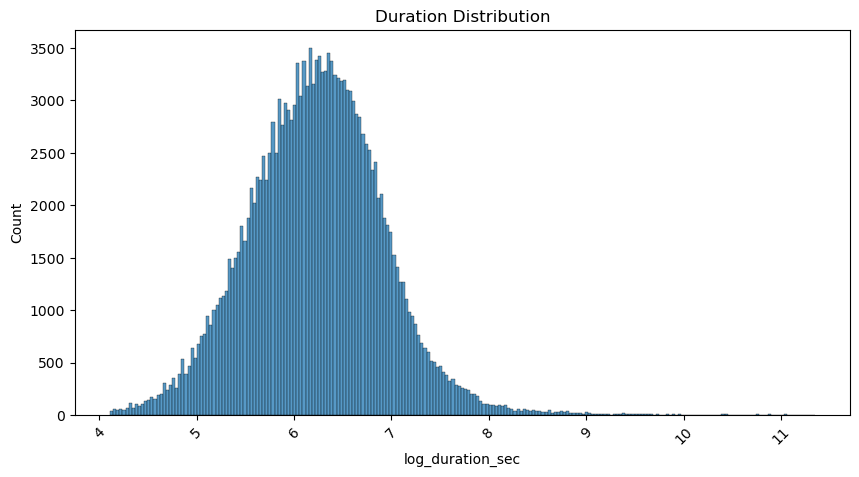

In [78]:
univariate_plot('log_duration_sec', 'Duration Distribution')

- The distribution looks normal now

#### Top 5 Most Popular Start Stations

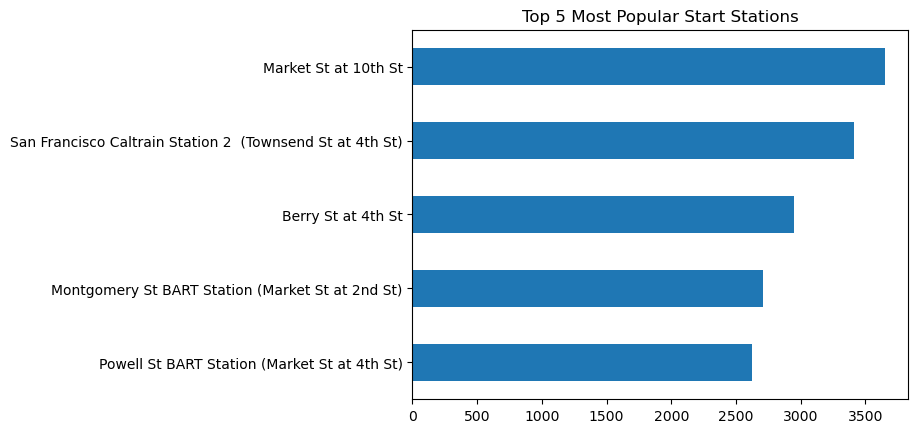

In [79]:
df['start_station_name'].value_counts().head().plot.barh()
plt.gca().invert_yaxis()
plt.title('Top 5 Most Popular Start Stations');

#### Top 5 Least Popular Start Stations

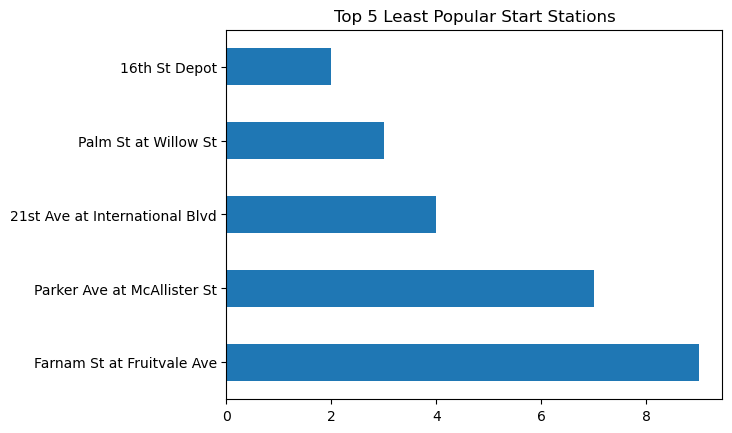

In [80]:
df['start_station_name'].value_counts().tail().plot.barh()
plt.title('Top 5 Least Popular Start Stations');

#### Top 5 Most Popular End Stations

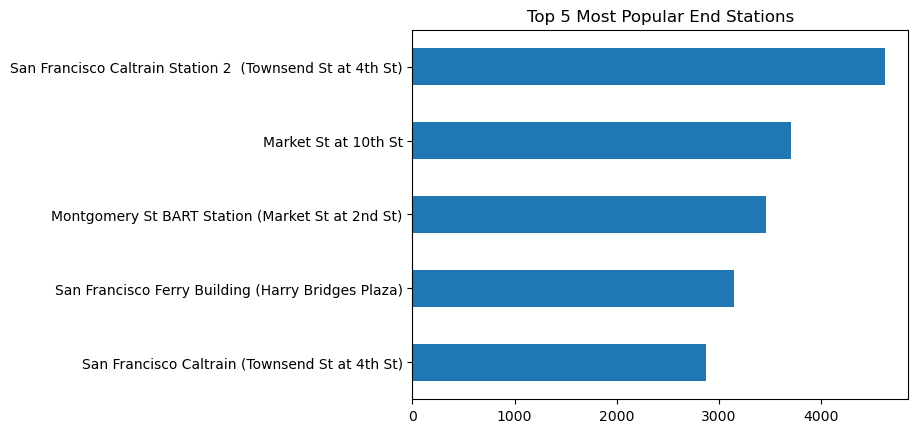

In [81]:
df['end_station_name'].value_counts().head().plot.barh()
plt.gca().invert_yaxis()
plt.title('Top 5 Most Popular End Stations');

#### Top 5 Least Popular End Stations

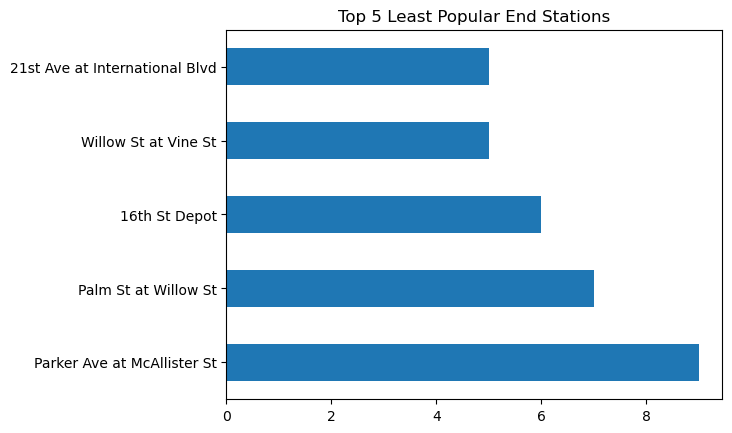

In [82]:
df['end_station_name'].value_counts().tail().plot.barh()
plt.title('Top 5 Least Popular End Stations');

#### User Type

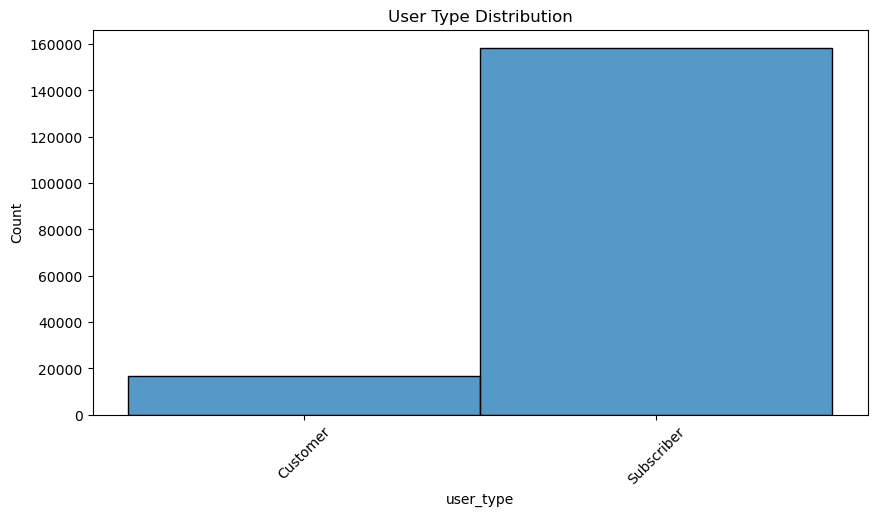

In [83]:
univariate_plot('user_type', 'User Type Distribution')

- Most users are subscibers

#### Gender

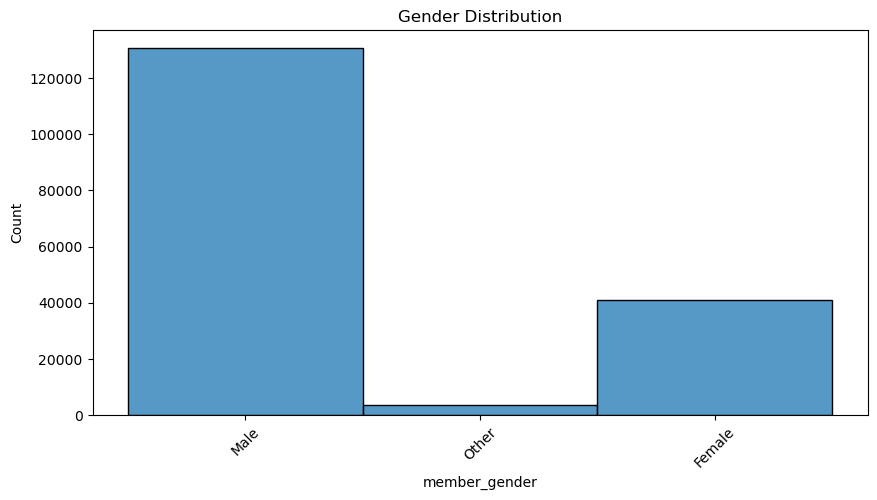

In [84]:
univariate_plot('member_gender', 'Gender Distribution')

- Most riders are male, followed by female and then other genders

#### Bike Share

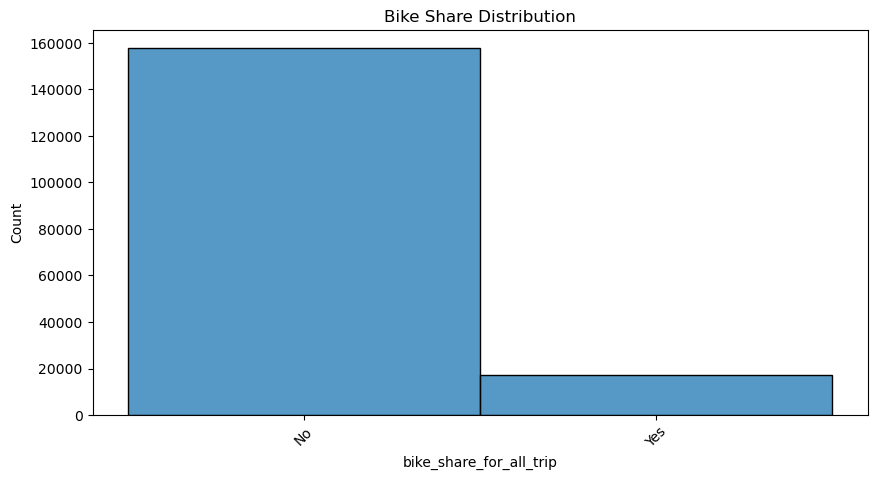

In [85]:
univariate_plot('bike_share_for_all_trip', 'Bike Share Distribution')

- Most rides are non-bike shared rides

#### Age

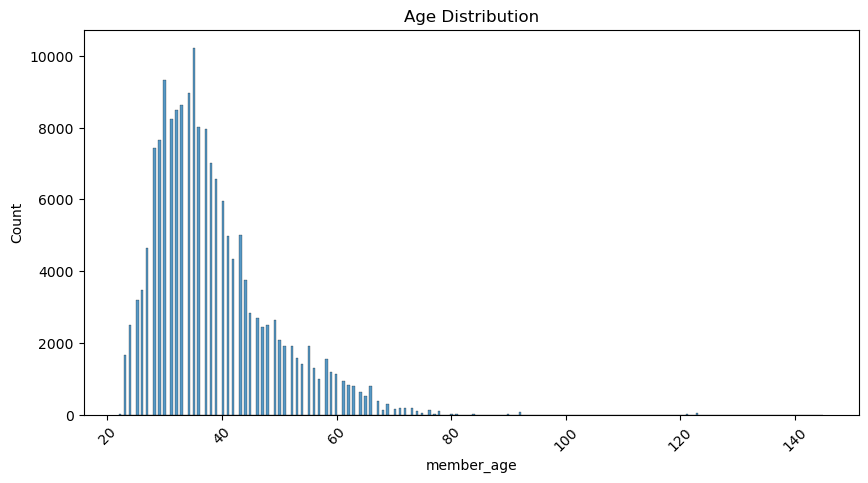

In [86]:
univariate_plot('member_age', 'Age Distribution')

- There are some riders over 100 years old, even as much as 140 years
- Most riders are between 20 - 80 years

In [87]:
# getting the count of riders over 80 years
df[df['member_age'] > 80].count()

duration_sec               233
start_time                 233
end_time                   233
start_station_id           233
start_station_name         233
start_station_latitude     233
start_station_longitude    233
end_station_id             233
end_station_name           233
end_station_latitude       233
end_station_longitude      233
bike_id                    233
user_type                  233
member_birth_year          233
member_gender              233
bike_share_for_all_trip    233
member_age                 233
ride_dow                   233
log_duration_sec           233
dtype: int64

- There are 233 riders over the age of 80

**Could these be forgotten records?**

In [88]:
# checking duration in seconds for riders over 80 years
print(f"Minimum Duration for riders over 80 years: {df[df['member_age'] > 80]['duration_sec'].min()}")
print(f"Maximum Duration for riders over 80 years: {df[df['member_age'] > 80]['duration_sec'].max()}")
print(f"Average Duration for riders over 80 years: {df[df['member_age'] > 80]['duration_sec'].mean()}")

Minimum Duration for riders over 80 years: 61
Maximum Duration for riders over 80 years: 5855
Average Duration for riders over 80 years: 497.343347639485


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distributions for my variables on interest seemed normal except the duration variable which i had to transform.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distributions for trip duration was right-skewed, so I had to log transform it.

## Bivariate Analysis

#### Duration against User type

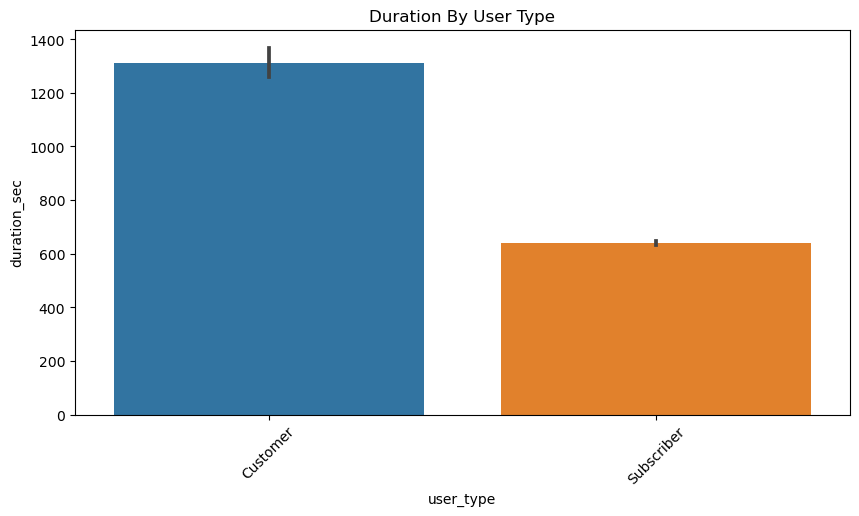

In [89]:
bivariate_plot('user_type', 'Duration By User Type')

- Customers ride for a longer time than subscribers

#### Which gender had the longest trip Duration?

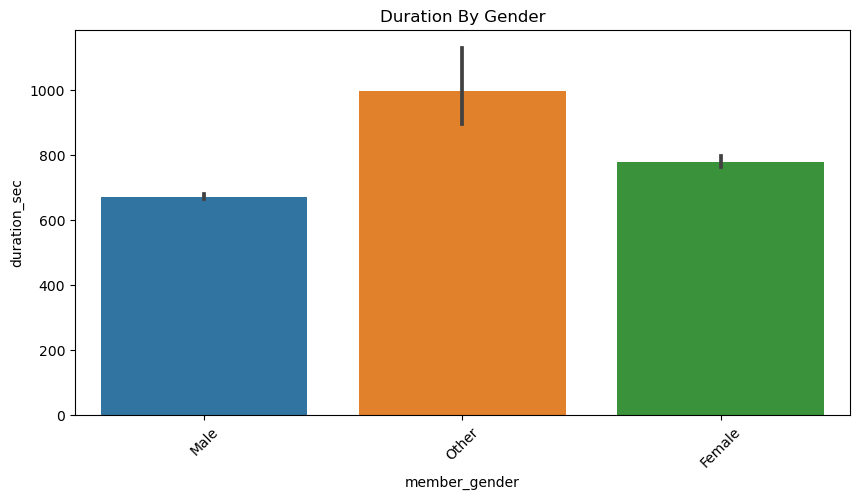

In [90]:
bivariate_plot('member_gender', 'Duration By Gender');

- Other genders and females ride for a longer duration than males

#### Did older dirvers perform the longest trips?

<Figure size 1000x500 with 0 Axes>

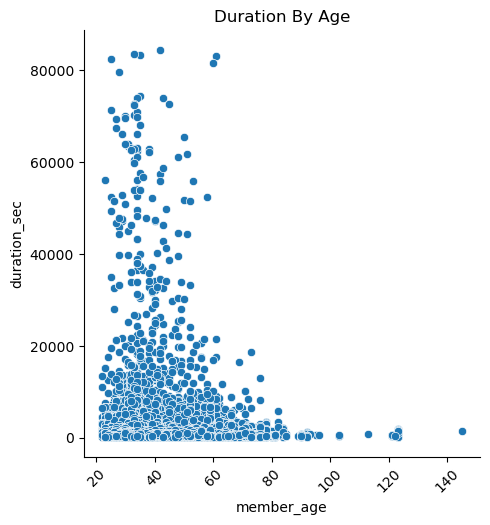

In [91]:
bivariate_plot('member_age', 'Duration By Age', plot_type=sns.relplot)

- Most trips are done by riders between 20 - 80 years, and the duration is majorly between 0 to 800 seconds

#### Log Duration against Age

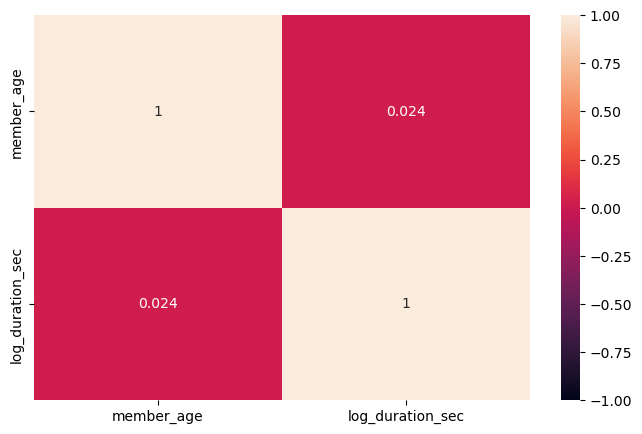

In [92]:
var_list = ['member_age', 'log_duration_sec']
var_df = df[var_list]
plt.figure(figsize=(8, 5))
sns.heatmap(var_df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

- There is no correlation between log_duration and age of riders.

#### Gender by Age

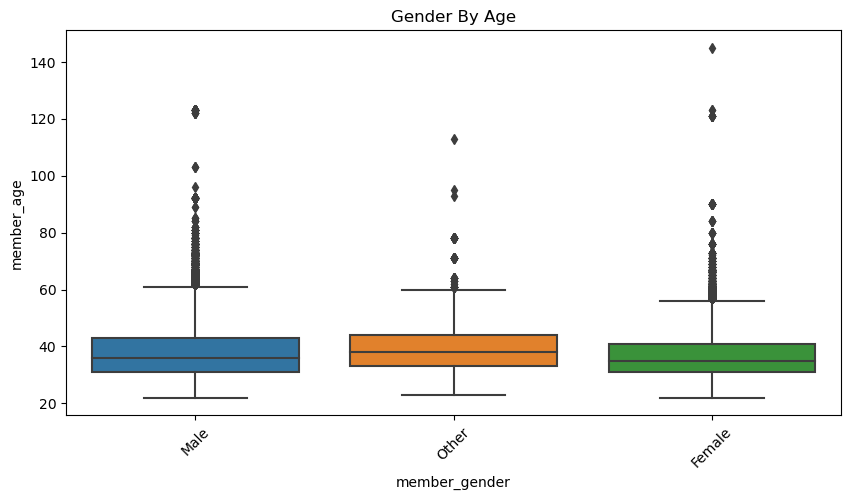

In [93]:
bivariate_plot('member_gender', 'Gender By Age', variable_y='member_age', plot_type = sns.boxplot);

- The genders for most riders are within the same age range

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> - Most trips are done by riders between 20 - 80 years, and the duration is majorly between 0 to 800 seconds

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> - The genders for most riders are within the same age range
> - There is no correlation between log_duration and age of riders

# Multivariate Exploration

#### Whats the relationship between Duration and User Type conditioned by Gender?

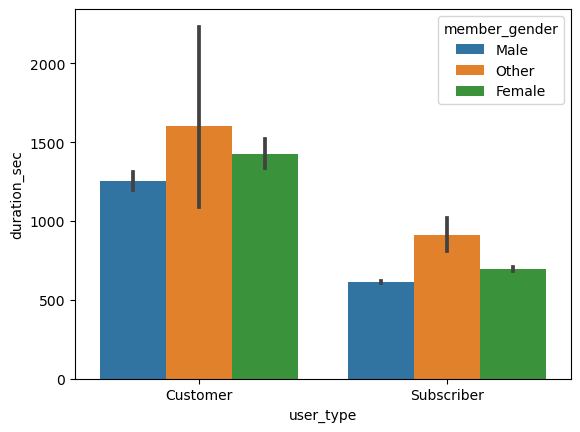

In [94]:
#plotting a bar plot to show duration by usertype conditioned by gender 
sns.barplot(data=df, x='user_type', y='duration_sec', hue='member_gender');

From the plot above, we can see that more riders are cutomers, and other genders and female ride longer durations than male. 

Lets investigate further by creating a line plot looking at the duration in hours, taking into consideration gender and the age.

#### Duration by Gender conditioned by Age

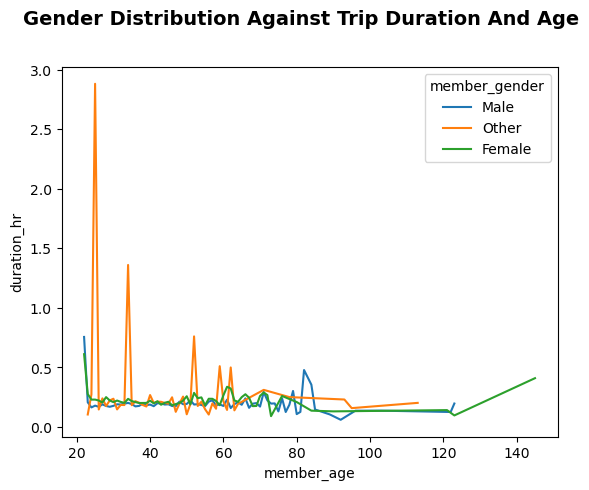

In [95]:
#Plotting a line graph to get Duration by Gender conditioned by Age
df['duration_hr']= (df['duration_sec']/3600)
sns.lineplot(x = 'member_age', y = 'duration_hr', ci= None, data = df, hue='member_gender')
plt.suptitle("Gender Distribution against Trip Duration and age".title(),y=1,fontsize=14,weight="bold");


From the plot above, We can see that younger riders took most of the longer trips and were mostly other genders.

Is it possible that the longer trips are shared trips? lets plot a scatter plot to find out

#### Whats the relationship between Duration and Bike sharing conditioned by Age

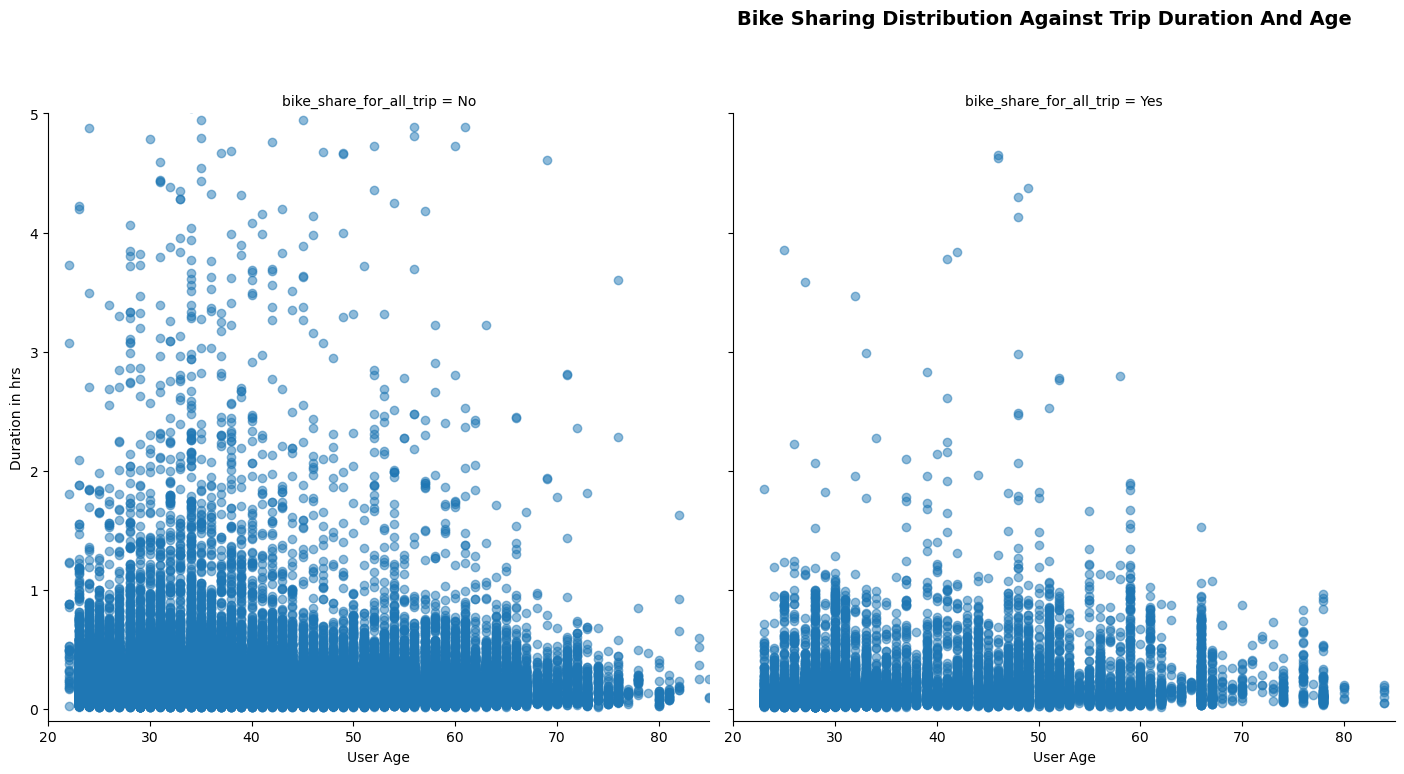

In [96]:
# Creating a scatter plot to examine the distribution for Bike sharing against trip duration in hrs and age 

df['duration_hr']= (df['duration_sec']/3600)
Dist_type = sns.FacetGrid(data = df, col = 'bike_share_for_all_trip', col_wrap = 3, height = 7,xlim = [20, 85], ylim = [-0.1, 5])
Dist_type.map(plt.scatter,'member_age', 'duration_hr', alpha=0.5)
Dist_type.set_xlabels('User Age')
Dist_type.set_ylabels('Duration in hrs')
plt.suptitle("Bike Sharing Distribution against Trip Duration and age".title(),y=1.1,fontsize=14,weight="bold");


We can see from the plot above that most of the Long trips were not shared trips and were mostly done by younger drivers. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> From the plot above, we can see that more riders are cutomers, and other genders and female ride longer durations than male. 


### Were there any interesting or surprising interactions between features?

> There were no Interesting surprises

## Conclusions

From the analysis perfomed above i noticed the following, 

- Other genders and females ride for a longer duration than males
- There are more subscribers than customers
- Customers ride for a longer time than subscribers
- Younger riders took most of the longer trips and were mostly other genders.
- we can see that more riders are cutomers, and other genders and female ride longer durations than male. 
- Most trips are done by riders between 20 - 80 years, and the duration is majorly between 0 to 800 seconds